In [1]:
# 캐글 설치
!pip install kaggle

In [4]:
#캐글 json 파일 불러오기
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('user uploaded file"{name}"with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
user uploaded file"kaggle (1).json"with length 64 bytes


In [5]:
# 캐글 폴더 생성
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!ls -1ha kaggle.json

! kaggle datasets download -d sadhliroomyprime/motorcycle-night-ride-semantic-segmentation

kaggle.json
motorcycle-night-ride-semantic-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip -q motorcycle-night-ride-semantic-segmentation.zip -d dataset_folder


replace dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/COCO_motorcycle (pixel).json? [y]es, [n]o, [A]ll, [N]one, [r]ename: none
replace dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png___fuse.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png___save.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (310).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Scr

In [7]:
import os
import cv2
import tensorflow as tf
from PIL import Image
import numpy as np

DATA_PATH = '/content/dataset_folder/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/'  # 다운로드한 데이터셋의 경로를 입력하세요.
DATA_FOLDER = os.path.join(DATA_PATH, 'images/')

image_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith(').png')]
mask_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith('ve.png')]

X_train = []
y_train = []

for image_file in image_files:
    # 이미지 파일 로드
    image_path = os.path.join(DATA_FOLDER, image_file)
    image = cv2.imread(image_path)
    X_train.append(image)

    # 해당 이미지에 대한 마스크 파일 찾기
    base_name = os.path.splitext(image_file)[0]  # 파일 이름에서 확장자 제거
    matching_mask_files = [mask_file for mask_file in mask_files if base_name in mask_file]
    if matching_mask_files:
        mask_file = matching_mask_files[0]  # 첫 번째 일치하는 마스크 파일 사용
        mask_path = os.path.join(DATA_FOLDER, mask_file)
        mask = cv2.imread(mask_path)
        y_train.append(mask)

X_train = np.array(X_train)
y_train = np.array(y_train)

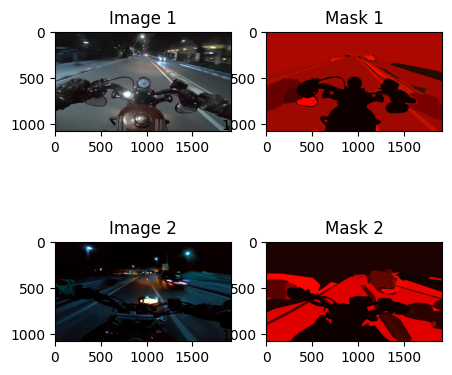

<Figure size 640x480 with 0 Axes>

In [8]:
# 이미지 표시, 마스크 로딩 된건지 확인
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(5, 5))

axs[0, 0].imshow(X_train[0])
axs[0, 0].set_title("Image 1")
axs[0, 1].imshow(y_train[0])
axs[0, 1].set_title("Mask 1")
axs[1, 0].imshow(X_train[1])
axs[1, 0].set_title("Image 2")
axs[1, 1].imshow(y_train[1])
axs[1, 1].set_title("Mask 2")

plt.show()

plt.tight_layout() # 간격 넓어서 추가.


In [9]:
# 데이터 전처리
''' 원래 하려고 했던 방식
def augment1(image,label): # 밝기 조절
    delta = tf.random.uniform(shape=[], minval=-max_delta, maxval=max_delta)
    # 이미지의 밝기를 조절
    image = tf.image.adjust_brightness(image, delta)
    return image, label

def augment2(image, label):
    image = tf.image.random_flip_left_right(image) # 랜덤하게 좌우를 반전
    return image,label
'''

'''
# 과제하면서 찾은 방법
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.5, 1.5])

# X_train 이미지를 로드하고 증강
num_augmented_images_per_original = 3
for image in X_train:
    image = np.expand_dims(image, axis=0)  # 4차원 배열로 확장 (처음에 오류 → ChatGPT 물어봄)
    augmented_images = datagen.flow(image)
    for i in range(num_augmented_images_per_original):
        augmented_image = augmented_images.next()
        augmented_image = augmented_image[0]
'''

'\n# 과제하면서 찾은 방법 \nimport numpy as np\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\n\ndatagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.5, 1.5])\n\n# X_train 이미지를 로드하고 증강\nnum_augmented_images_per_original = 3\nfor image in X_train:\n    image = np.expand_dims(image, axis=0)  # 4차원 배열로 확장 (처음에 오류 → ChatGPT 물어봄)\n    augmented_images = datagen.flow(image)\n    for i in range(num_augmented_images_per_original):\n        augmented_image = augmented_images.next()\n        augmented_image = augmented_image[0] \n'

In [10]:
print(X_train.shape)
print(y_train.shape)
# 200장 이었던거 같은데 2장 어디간거지?

(198, 1080, 1920, 3)
(198, 1080, 1920, 3)


In [11]:
# Q. 사이즈 조절 vs 그대로 넣기
# A. 1920*1080 사이즈 그대로 넣고 돌려봤는데, 바로 멈춤 → 사이즈 조절



In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D
from tensorflow.keras.models import Model


# 참고했던 유튜브: https://www.youtube.com/watch?v=nCL7Y58jzH8&t=738s (파이토)
def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder 부분
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # 중간층
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)

    # Decoder 부분
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = concatenate([up4, conv2], axis=3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv1], axis=3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up5)

    # 출력층
    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# U-Net 모델 생성
model = unet(input_size=(256, 256, 3))


In [13]:
# 사이즈 조절 - 리사이징 방법 (나중에 공부해볼 주제)
'''
이미지 크기를 리사이징할 때 원본 이미지와 목표 크기의 가로와 세로 비율이 다른 경우,
이미지를 리사이징하는 과정에서 비율을 유지하기 위해 몇 가지 방법을 사용할 수 있습니다.
일반적으로 다음 두 가지 방법을 사용합니다:

원본 비율을 유지한 채 리사이징
: 원본 이미지의 가로와 세로 비율을 계산하고, 이 비율을 유지한 채로 목표 크기에 맞게 이미지를 리사이징합니다.
이를 통해 원본 이미지의 종횡비가 유지됩니다. 일반적으로 빈 공간이 생길 수 있습니다.

가로 또는 세로 중 하나의 크기를 맞추고 다른 크기를 조정
: 가로와 세로 중 하나의 크기를 목표 크기에 맞추고, 다른 크기는 비율을 유지하면서 조정합니다.
이 방법은 원본 이미지의 한 쪽 크기를 맞추고 나머지 쪽을 잘라내는 경우입니다. 이렇게 하면 이미지가 잘릴 수 있습니다.
'''

target_size = (256, 256)
X_train_resized = []


def resize_image(image):
    resized_image = cv2.resize(image, target_size)
    return resized_image

# X_train 이미지를 리사이징하고 리스트에 저장
for image in X_train:
    resized_image = resize_image(image)
    X_train_resized.append(resized_image)

# NumPy 배열로 변환
X_train_resized = np.array(X_train_resized)

# 결과 확인
print(X_train_resized.shape)

X_train = X_train_resized
#이렇게 그대로 바꿔주는게 하기에는 편한데, 보통 X_train_resized = [] 식으로 선언하고 그걸 넣어주는 이유는 데이터 저장과 관련있는건가?


(198, 256, 256, 3)


In [14]:
# 모델 확인
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 128)        73856     ['max_pooling2d[0][0]']   

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

num_classes = 6

from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=num_classes)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='try1', save_best_only=True)
    ]

epochs = 2
batch_size = 8

history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size)

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import MeanIoU

# 데이터셋 로드 (X_train: 입력 이미지, y_train: 정답 레이블)
X_train, y_train = load_dataset()  # 실제 데이터 로드 함수를 사용해야 함

# U-Net 모델 생성
model = unet(input_size=(256, 256, 3))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=binary_crossentropy,
              metrics=[MeanIoU(num_classes=2)])

# 모델 학습
epochs = 5  # 학습 에포크 수를 조정하세요
batch_size = 8  # 배치 크기를 조정하세요

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
